In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, './python_helper_files/')
from post_processing_multi import * # Import data post processing functions
from plotting_helper_RQC import * # Import helper functions for plotting in ipynb
warnings.filterwarnings('ignore') # supress warnings for clenliness

# Loading data
Data is provided in a folder (or series of folders) and is loaded and processed with budget assignment by the ```load_multiple_files_budget``` function. This is wrapped in the load_max_cut_data. This takes a long time due to the large number of files that needs to be processed. If data were stored differently (i.e. in a database), this would be much faster. 

In [2]:
unfiltered_rqc_data = load_rqc_data() # Full data, good for looking at relationship with shots, budget is a placeholder here.
filtered_rqc_data = filter_rqc_data(unfiltered_rqc_data) #Filtered data to which appropiate budget is assigned.

## Figures from the main text

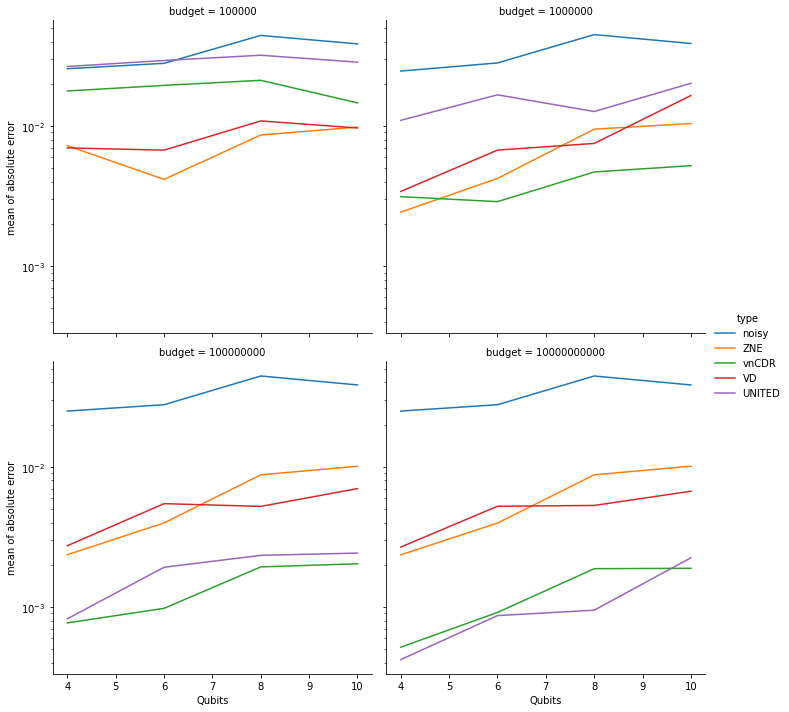

In [3]:
figure_2(filtered_rqc_data,'mean')

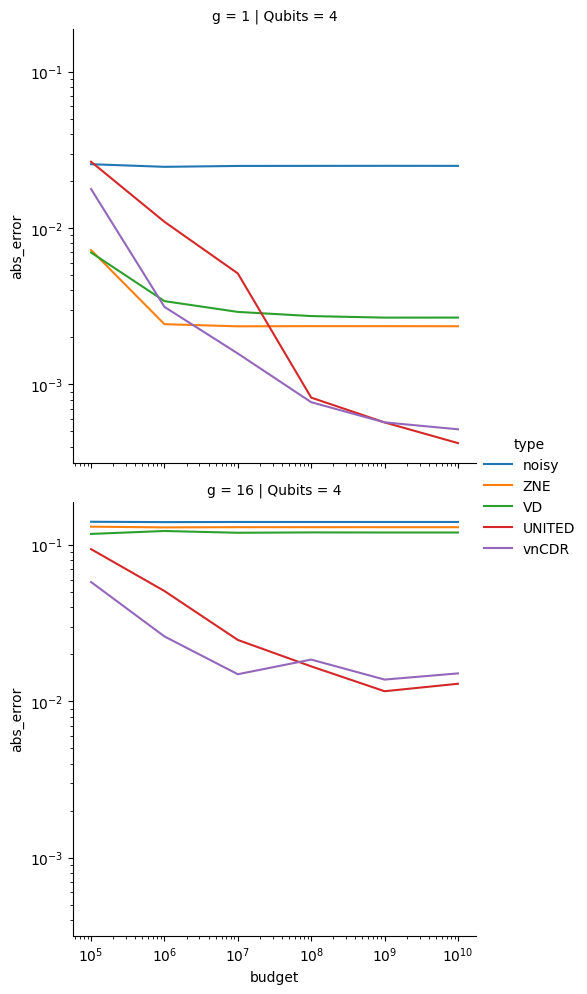

In [4]:
figure_3(filtered_rqc_data,'mean')

## Loading all the data and appendix figures

In [48]:
# Training and COI data
raw_data = load_raw_rqc_data()
train = raw_data['train']
coi = raw_data['coi']

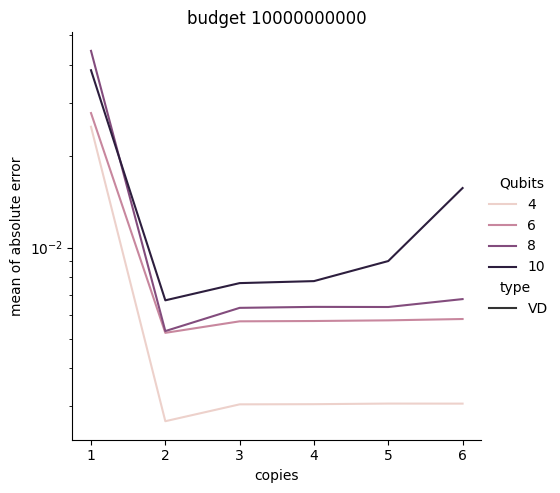

In [59]:
figure_7(filtered_rqc_data,10**10,'mean',g=1)

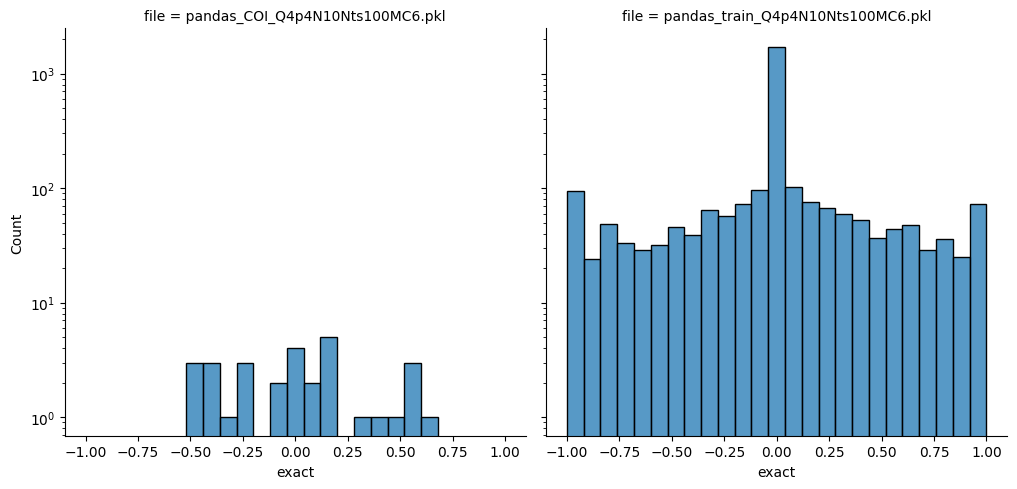

In [58]:
figure_8(coi,train,qubit=4,depth=4)

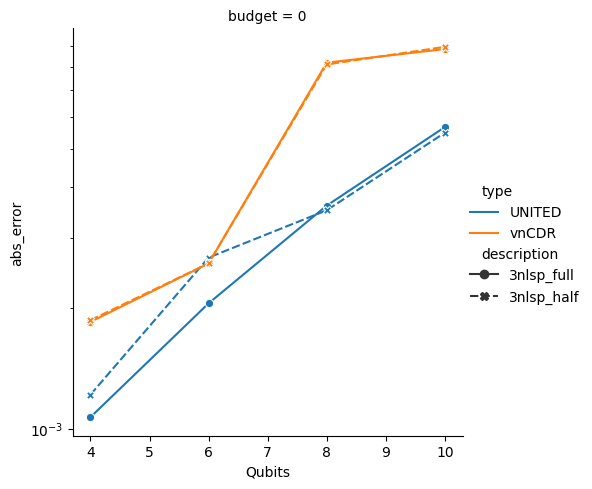

In [34]:
effect_of_training_set(filtered_rqc_data)